# Linear Regression (Continuous Features)

Test MSE: 7.90934077572921


/tmp/ipykernel_33409/593812807.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(feature_names, rotation=90, fontsize=10)


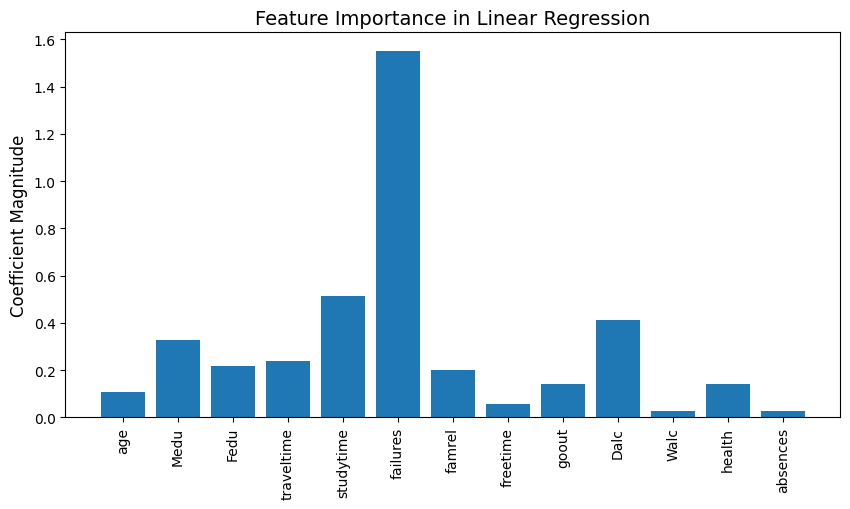

In [13]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from ucimlrepo import fetch_ucirepo
import matplotlib.pyplot as plt

student_performance = fetch_ucirepo(id=320)

X = student_performance.data.features
y = student_performance.data.targets

# dropping all non-numeric features
int_feats = student_performance.variables[(student_performance.variables['type'] == 'Integer') & (student_performance.variables['role'] == 'Feature')]['name'].tolist()
X_int = X[int_feats]

X_train, X_test, y_train, y_test = train_test_split(X_int, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

print(f"Test MSE: {mse}")


# feature importance plotting
if model.coef_.ndim > 1:
    feature_importance = np.abs(model.coef_).mean(axis=0)  # Mean importance if multiple targets
else:
    feature_importance = np.abs(model.coef_) 
feature_names = X_int.columns
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(feature_names, feature_importance)
ax.set_xticklabels(feature_names, rotation=90, fontsize=10)
ax.set_ylabel("Coefficient Magnitude", fontsize=12)
ax.set_title("Feature Importance in Linear Regression", fontsize=14)

plt.show()
